## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import (
    ensemble,
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve
)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip uninstall pandas-profiling
#!pip uninstall pyjanitor --yes

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install pyjanitor==0.23.1
#!pip install cookiecutter

## **Coleta de dados**


In [ ]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## **Limpeza de dados**


In [ ]:
df.dtypes #tipos das colunas do dataframe

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
df.shape #tamanho do dataframe (linhas x colunas)

(1309, 14)



*   Estatísticas resumidas (apenas das colunas numéricas)
*   Count = quantidade de valores diferentes de NaN
*   Conferir valores máximo e mínimo para ver se há valores discrepantes (Box plot criará uma visão gráfica disso)




In [ ]:
df.describe().iloc[:, :2] #Estatísticas resumidas (apenas das colunas numéricas)
#Count = quantidade de valores diferentes de NaN
#

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


###### **Pandas_profiling**

Inclui um relatório de perfil. Ele sintetizará os tipos das colunas e permitirá que você visualize os detalhes estatistíco dos quantis, as estatísticas descritivas, hitogramas, valores comuns e extremos.

In [ ]:
import pandas_profiling
#pandas_profiling.ProfileReport(df)



Lidar com dados ausentes é necessário, o método **isnull().sum()** é essencial para identificar colunas ou linhas com valores ausentes

**OBS:.** Só o isnull() retorna o dataframe com True e False apontando para as celulas que tem ou não valores nulos



In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
df.isnull().sum(axis=1) #axis=1 faz a soma ser horizontalmente

0       1
1       1
2       2
3       1
4       2
       ..
1304    3
1305    5
1306    3
1307    4
1308    4
Length: 1309, dtype: int64

In [ ]:
mask = df.isnull().any(axis=1) #True se a linha tem dados ausentes
mask

0       True
1       True
2       True
3       True
4       True
        ... 
1304    True
1305    True
1306    True
1307    True
1308    True
Length: 1309, dtype: bool

In [ ]:
df['sex'].value_counts(dropna=False)

male      843
female    466
Name: sex, dtype: int64

In [ ]:
df['embarked'].value_counts(dropna=False) #pandas ignora valores nulos ou NaN, o dropna=False é usado para contar quantidades de linhas nulas

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

## **Crie os atributos**

Excluindo colunas que não são relevantes para o modelo preditivo

In [ ]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,female,14.5000,1.0,0.0,14.4542,C
1305,3.0,0.0,female,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C


In [ ]:
df = pd.get_dummies(df) #substituindo colunas categoricas
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

É necessário excluir colunas correlacionadas de forma perfeita. Removendo qualquer uma dela. A multicolinearidade pode causar impactos na interpretação de importância dos atributos.

In [ ]:
df[['sex_male','sex_female']].corr()

,sex_male,sex_female
sex_male,1.0,-1.0
sex_female,-1.0,1.0


In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df = df.drop(columns="sex_male")
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

Dividindo o dataframe em X(atributos) e y(label)

In [ ]:
y = df.survived
X = df.drop(columns='survived')
X, y

# OR

# import janitor as jn
# X, y = jn.get_features_targets(
#     df, target_columns="survived"
# )


(      pclass      age  sibsp  parch      fare  sex_female  embarked_C  \
 0        1.0  29.0000    0.0    0.0  211.3375           1           0   
 1        1.0   0.9167    1.0    2.0  151.5500           0           0   
 2        1.0   2.0000    1.0    2.0  151.5500           1           0   
 3        1.0  30.0000    1.0    2.0  151.5500           0           0   
 4        1.0  25.0000    1.0    2.0  151.5500           1           0   
 ...      ...      ...    ...    ...       ...         ...         ...   
 1304     3.0  14.5000    1.0    0.0   14.4542           1           1   
 1305     3.0      NaN    1.0    0.0   14.4542           1           1   
 1306     3.0  26.5000    0.0    0.0    7.2250           0           1   
 1307     3.0  27.0000    0.0    0.0    7.2250           0           1   
 1308     3.0  29.0000    0.0    0.0    7.8750           0           0   
 
       embarked_Q  embarked_S  
 0              0           1  
 1              0           1  
 2            

## **Separe as amostras**

Usaremos o train_test_split com random_state 42 para eliminar a aleatoriedade caso venhamos a comparar diferentes modelos (caso venhamos a rodar novamente a célula a separação vai ser respeitada desde o primeiro run)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 
X_train

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
1214,3.0,NaN,0.0,0.0,8.6625,0,0,0,1
677,3.0,26.0,0.0,0.0,7.8958,0,0,0,1
534,2.0,19.0,0.0,0.0,26.0000,1,0,0,1
1174,3.0,NaN,8.0,2.0,69.5500,1,0,0,1
864,3.0,28.0,0.0,0.0,7.7750,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1095,3.0,NaN,0.0,0.0,7.6292,1,0,1,0
1130,3.0,18.0,0.0,0.0,7.7750,1,0,0,1
1294,3.0,28.5,0.0,0.0,16.1000,0,0,0,1
860,3.0,26.0,0.0,0.0,7.9250,1,0,0,1


## **Faça a imputação de dados**

In [ ]:
df.isnull().sum()

pclass          0
survived        0
age           263
sibsp           0
parch           0
fare            1
sex_female      0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64

Preencha os valores NA/NaN usando o método especificado.

In [ ]:
# meds = X_train.median()
# X_train = X_train.fillna(meds)
# X_test = X_test.fillna(meds)

Imputrador multivariado que estima cada recurso de todos os outros. (Basicamente criar uma regressão para prever qual valor deve ser imputado baseado nas outras features)

In [ ]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [ ]:
print(f"""
Valores nulos no teste: {X_test.isnull().sum().sum()}
Valores nulos no treino: {X_train.isnull().sum().sum()}
""")


Valores nulos no teste: 0
Valores nulos no treino: 0



## **Normalize os dados**

In [ ]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_female','embarked_C','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_female','embarked_C','embarked_Q','embarked_S']].reset_index(drop=True))

## **Modelo base (comparativo)**

Esse classificador serve como uma linha de base simples para comparar com outros classificadores mais complexos.

In [ ]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)  # accuracy

0.5699745547073791

In [ ]:
from sklearn import metrics
y_pred = bm.predict(X_test)
metrics.precision_score(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[224   0]
 [169   0]]


In [ ]:
sns.heatmap(cm, annot=True)

## **Várias famílias**

In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (
    LogisticRegression,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
)
import xgboost

for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:
    cls = model()
    kfold = model_selection.KFold(
        n_splits=10
    )
    s = model_selection.cross_val_score(
        cls, X, y, scoring="roc_auc", cv=kfold
    )
    print(
        f"{model.__name__:22}  AUC: "
        f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyClassifier         AUC: 0.500 STD: 0.00
LogisticRegression      AUC: 0.843 STD: 0.03
DecisionTreeClassifier  AUC: 0.767 STD: 0.04
KNeighborsClassifier    AUC: 0.830 STD: 0.05
GaussianNB              AUC: 0.811 STD: 0.03
SVC                     AUC: 0.834 STD: 0.05
RandomForestClassifier  AUC: 0.848 STD: 0.03
XGBClassifier           AUC: 0.866 STD: 0.04


## **Stacking**

In [ ]:
# from mlxtend.classifier import StackingClassifier
# clfs = [
#     x()
#     for x in [
#         LogisticRegression,
#         DecisionTreeClassifier,
#         KNeighborsClassifier,
#         GaussianNB,
#         SVC,
#         RandomForestClassifier,
#     ]
# ]
# stack = StackingClassifier(
#     classifiers=clfs,
#     meta_classifier=LogisticRegression(),
# )
# kfold = model_selection.KFold(
#     n_splits=10
# )
# s = model_selection.cross_val_score(
#     stack, X, y, scoring="roc_auc", cv=kfold
# )
# print(
#     f"{stack.__class__.__name__}  "
#     f"AUC: {s.mean():.3f}  STD: {s.std():.2f}"
# )

## **Crie o modelo**

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Avalie o modelo**

Média de precisão da predição

In [ ]:
rf.score(X_test, y_test)

0.7964376590330788

Precisão do modelo

In [ ]:
y_pred = rf.predict(X_test)
metrics.precision_score(y_test, y_pred)

0.8027210884353742

Importância dos atributos, ou seja, quanto aquele atributo influenciou no modelo. (Modelos baseados em árvores que conseguem inspecionar a importância dos atributos)

A importância dos atributos é calculada observado o aumento no erro. Se a remoção de um atributo causar um aumento no erro do modelo, é sinal que o atributo é importante.

In [ ]:
for col, val in sorted(
    zip(
        X_train.columns,
        rf.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:

  print(f"{col:10}{val:10.3f}")

age            0.281
fare           0.263
sex_female     0.241
pclass         0.090
sibsp          0.049


In [ ]:
print(X_train.columns)
print(rf.feature_importances_)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')
[0.09021387 0.28064256 0.04886001 0.03686607 0.26253949 0.24088147
 0.01831178 0.00593451 0.01575024]


## **Otimize o modelo**

In [ ]:
rf4 = ensemble.RandomForestClassifier()
params = {
    "max_features" : [0.4, "auto"],
    "n_estimators" : [15,200],
    "min_samples_leaf" : [1, 0.1],
    "random_state" : [42]
}

cv = model_selection.GridSearchCV(
    rf4, params, n_jobs=-1
).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [ ]:
rf5 = ensemble.RandomForestClassifier(max_features=0.4, min_samples_leaf=1, n_estimators=200, random_state=42)
rf5.fit(X_train, y_train)
rf5.score(X_test, y_test)

0.7964376590330788

## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = rf5.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Curva ROC**

In [ ]:
roc_auc_score(y_test, y_pred)

0.7858331572273879

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

viz = ROCAUC(rf5)

viz.fit(X_train, y_test)

viz.score(X_test, y_test)

viz.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **Curva de Aprendizado**

Adições de mais dados de amostras poderiam ajudar o modelo a identificar as classes de uma forma melhor (eles não se convergiram, mas poderão ao longo do tempo)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    rf5,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_job=4,
    ax=ax
)
lc_viz.fit(X, y)
lc_viz.poof()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf5,
    X=X,
    y=y,
    cv=10,
    scoring="accuracy",
    n_jobs = 1,
    train_sizes = np.linspace(0.3, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
train_std = np.std(train_scores, axis = 1)
test_mean = test_scores.mean(axis=1)
test_std = np.std(test_scores, axis = 1)

plt.subplots(figsize=(6,6))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = '#DDDDDD')

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

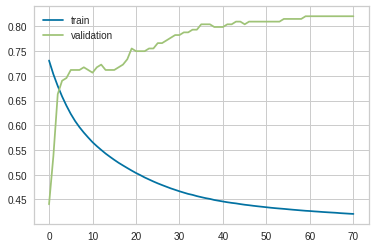

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(
    activation="relu",
    max_iter=3000, 
    validation_fraction=0.2, 
    early_stopping=True)

mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_, label="train")
plt.plot(mlp.validation_scores_, label="validation")
plt.legend()

## **Implante o modelo**

In [ ]:
import pickle

pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7858331572273879